Task 1 Git Hub link:

# **INDEX**
> 1. **[Task 1](#1)**
> 2. **[Import Libraries](#2)**
> 3. **[perform EDA](#3)**
> 4. **[Model Creation](#4)**



<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Task 1
    
<a class="anchor" id="1"></a>

In [142]:
"""Your model will be evaluated based on its ability to accurately forecast the number of units sold for each item ID.
The primary evaluation metric will be the Mean Squared Error (MSE). This metric measures the average magnitude of the
errors between the predicted and actual values, with lower MSE values indicating better model performance."""




'Your model will be evaluated based on its ability to accurately forecast the number of units sold for each item ID. \nThe primary evaluation metric will be the Mean Squared Error (MSE). This metric measures the average magnitude of the \nerrors between the predicted and actual values, with lower MSE values indicating better model performance.'

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Import libraries
    
<a class="anchor" id="2"></a>

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [144]:
#import train dataset
data=pd.read_csv("/content/train.csv")

In [145]:
#visit how our data is arrange
data.head()

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.0
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,NaN,NAPQUEEN,0.0,0.0
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0


In [146]:
# Get an overview of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB
None


In [147]:
"By using the above code we can find which is classification feature or not."

'By using the above code we can find which is classification feature or not.'

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Perform EDA
    
<a class="anchor" id="3"></a>

In [148]:
#Now convert the non numeric value into numeric value

In [149]:
#Handling Date columns, So we want to extract the date from date, months, Years.

In [150]:
# Label Encoding all non-numeric columns
label_encoder = LabelEncoder()

# List of columns to label encode (excluding the date, which will be handled separately)
columns_to_encode = ['ID','Item Id', 'Item Name', 'anarix_id']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Converting 'date' to datetime and extracting useful features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Dropping the original 'date' column
data = data.drop(columns=['date'])



In [151]:
# Display the transformed data
data.head()

,ID,Item Id,Item Name,ad_spend,anarix_id,units,unit_price,year,month,day
0,0,9,146,NaN,0,0.0,0.0,2022,4,12
1,9,25,30,NaN,0,0.0,0.0,2022,4,12
2,2,17,158,NaN,0,0.0,0.0,2022,4,12
3,3,18,153,NaN,0,0.0,0.0,2022,4,12
4,4,19,154,NaN,0,0.0,0.0,2022,4,12


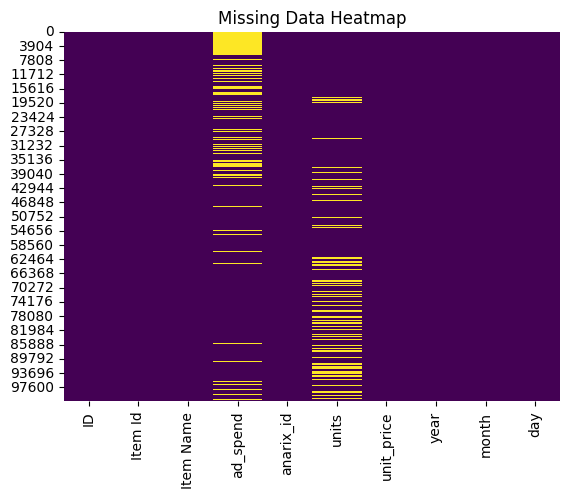

ID             0.000000
Item Id        0.000000
Item Name      0.000000
ad_spend      23.831905
anarix_id      0.000000
units         17.635235
unit_price     0.000000
year           0.000000
month          0.000000
day            0.000000
dtype: float64


In [152]:
# Visualizing missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Percentage of missing data
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

In [154]:
#Here i try to fill the NA value using differnt methods.
#so I want to comopare each and every method to get the better model

# Example: Compare Mean, Median, and Mode Imputation on Model Performance

# Data with Mean Imputation
data_mean_imputed = data.fillna(data.mean())

# Data with Median Imputation
data_median_imputed = data.fillna(data.median())

# Data with Mode Imputation (for illustration, assuming a categorical approach)
data_mode_imputed = data.fillna(data.mode().iloc[0])

# Splitting the dataset
X_mean = data_mean_imputed.drop(columns=['units'])
y_mean = data_mean_imputed['units']

X_median = data_median_imputed.drop(columns=['units'])
y_median = data_median_imputed['units']

X_mode = data_mode_imputed.drop(columns=['units'])
y_mode = data_mode_imputed['units']

# Train-test split
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.2, random_state=42)
X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)
X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)

# Training a model (Random Forest as an example)
model = RandomForestRegressor()

model.fit(X_train_mean, y_train_mean)
pred_mean = model.predict(X_test_mean)

model.fit(X_train_median, y_train_median)
pred_median = model.predict(X_test_median)

model.fit(X_train_mode, y_train_mode)
pred_mode = model.predict(X_test_mode)

# Compare Mean Squared Errors
mse_mean = mean_squared_error(y_test_mean, pred_mean)
mse_median = mean_squared_error(y_test_median, pred_median)
mse_mode = mean_squared_error(y_test_mode, pred_mode)

print(f"MSE (Mean Imputation): {mse_mean}")
print(f"MSE (Median Imputation): {mse_median}")
print(f"MSE (Mode Imputation): {mse_mode}")


MSE (Mean Imputation): 614.0337100863525
MSE (Median Imputation): 607.4217121440536
MSE (Mode Imputation): 645.0996333579664


In [155]:
dataf = data.fillna(data.median())

# Display the data to verify the changes
dataf.head()

,ID,Item Id,Item Name,ad_spend,anarix_id,units,unit_price,year,month,day
0,0,9,146,4.23,0,0.0,0.0,2022,4,12
1,9,25,30,4.23,0,0.0,0.0,2022,4,12
2,2,17,158,4.23,0,0.0,0.0,2022,4,12
3,3,18,153,4.23,0,0.0,0.0,2022,4,12
4,4,19,154,4.23,0,0.0,0.0,2022,4,12


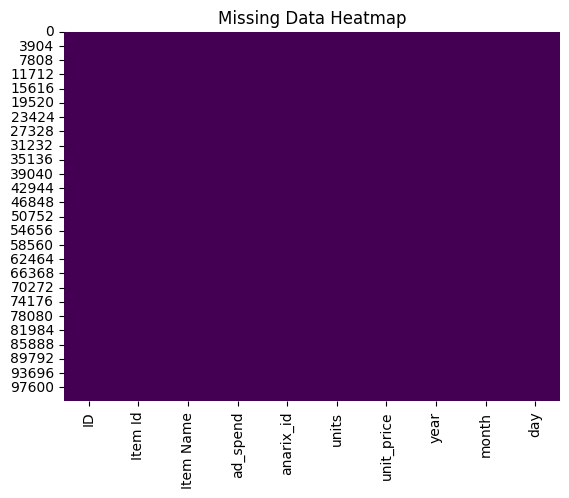

ID            0.0
Item Id       0.0
Item Name     0.0
ad_spend      0.0
anarix_id     0.0
units         0.0
unit_price    0.0
year          0.0
month         0.0
day           0.0
dtype: float64


In [156]:
# Visualizing missing data
sns.heatmap(dataf.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Percentage of missing data
missing_percentage = dataf.isnull().mean() * 100
print(missing_percentage)

In [157]:
# Summary statistics for numerical columns
dataf.describe()


,ID,Item Id,Item Name,ad_spend,anarix_id,units,unit_price,year,month,day
count,101490.000000,101490.000000,101490.000000,101490.000000,101490.0,101490.000000,101490.000000,101490.000000,101490.000000,101490.000000
mean,50744.500000,87.349749,114.701084,85.380609,0.0,8.647059,106.750922,2023.060193,6.051365,15.875692
std,29297.783747,59.366904,56.628864,464.170526,0.0,62.671795,425.704733,0.612782,3.488440,8.805040
min,0.000000,0.000000,0.000000,0.000000,0.0,-173.000000,-8232.000000,2022.000000,1.000000,1.000000
25%,25372.250000,35.000000,67.000000,0.540000,0.0,0.000000,0.000000,2023.000000,3.000000,8.000000
50%,50744.500000,76.000000,126.000000,4.230000,0.0,1.000000,0.000000,2023.000000,6.000000,16.000000
75%,76116.750000,140.000000,162.000000,21.640000,0.0,3.000000,0.000000,2023.000000,9.000000,23.000000
max,101489.000000,217.000000,199.000000,47934.990000,0.0,9004.000000,21557.390000,2024.000000,12.000000,31.000000


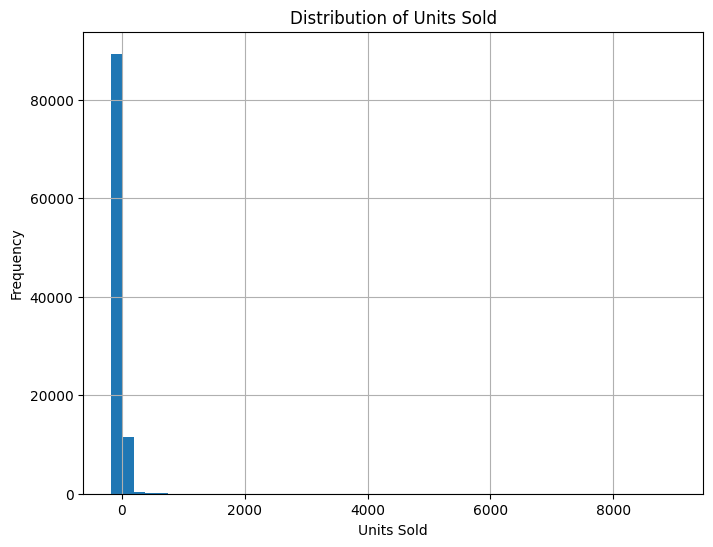

In [158]:
# Distribution of units sold
plt.figure(figsize=(8,6))
plt.hist(dataf['units'], bins=50)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


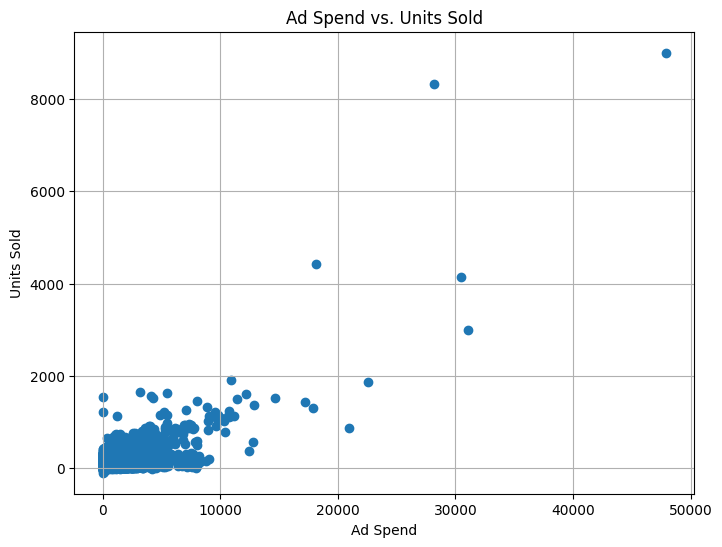

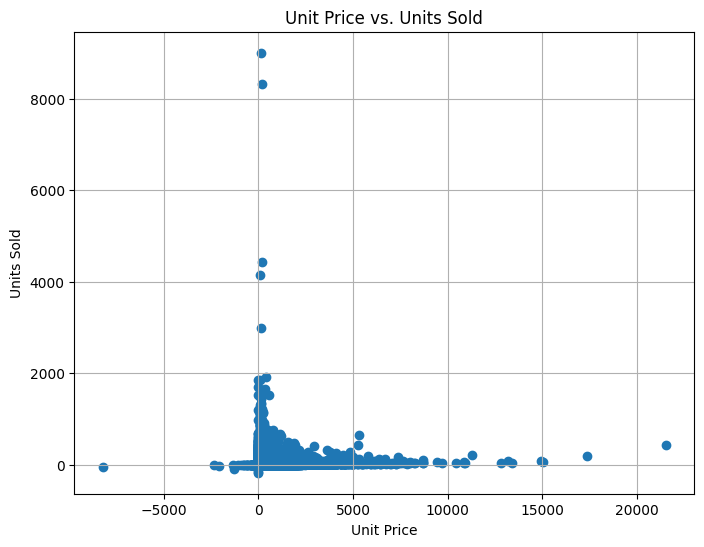

In [159]:
# Relationship between ad_spend and units sold
plt.figure(figsize=(8,6))
plt.scatter(data['ad_spend'], data['units'])
plt.title('Ad Spend vs. Units Sold')
plt.xlabel('Ad Spend')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# Relationship between unit_price and units sold
plt.figure(figsize=(8,6))
plt.scatter(data['unit_price'], data['units'])
plt.title('Unit Price vs. Units Sold')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()


Perform EDA on Test data


In [190]:
test_data = pd.read_csv("/content/test.csv")


In [191]:
# Print column names to verify
print(test_data.columns)


Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id',
       'unit_price'],
      dtype='object')


In [192]:
# Check if 'date' column is in DataFrame
if 'date' in test_data.columns:
    test_data['date'] = pd.to_datetime(test_data['date'])
    test_data['year'] = test_data['date'].dt.year
    test_data['month'] = test_data['date'].dt.month
    test_data['day'] = test_data['date'].dt.day
    test_data = test_data.drop(columns=['date'])
else:
    print("The 'date' column is not in the DataFrame.")


In [193]:
# Identify numeric columns
numeric_cols = test_data.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with the median of each column
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].median())

# For non-numeric columns, you can fill missing values with a placeholder or other appropriate values
# For example, filling string columns with 'unknown'
non_numeric_cols = test_data.select_dtypes(exclude=['number']).columns
test_data[non_numeric_cols] = test_data[non_numeric_cols].fillna('unknown')

# Verify changes
test_data.head()


,ID,Item Id,Item Name,ad_spend,anarix_id,unit_price,year,month,day
0,2024-07-01_B09KDR64LT,B09KDR64LT,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",39.20,NAPQUEEN,0.0,2024,7,1
1,2024-07-01_B09KDTS4DC,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",39.20,NAPQUEEN,0.0,2024,7,1
2,2024-07-01_B09KDTHJ6V,B09KDTHJ6V,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",39.20,NAPQUEEN,0.0,2024,7,1
3,2024-07-01_B09KDQ2BWY,B09KDQ2BWY,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",39.20,NAPQUEEN,0.0,2024,7,1
4,2024-07-01_B09KDYY3SB,B09KDYY3SB,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",101.72,NAPQUEEN,1094.5,2024,7,1


In [194]:
# Label Encoding all non-numeric columns
label_encoder = LabelEncoder()

# List of columns to label encode (excluding the date, which will be handled separately)
columns_to_encode = ['ID','Item Id', 'Item Name', 'anarix_id']

for column in columns_to_encode:
    test_data[column] = label_encoder.fit_transform(test_data[column])





In [195]:
test_data.head()

,ID,Item Id,Item Name,ad_spend,anarix_id,unit_price,year,month,day
0,5,5,79,39.20,0,0.0,2024,7,1
1,7,7,92,39.20,0,0.0,2024,7,1
2,6,6,83,39.20,0,0.0,2024,7,1
3,4,4,81,39.20,0,0.0,2024,7,1
4,11,11,78,101.72,0,1094.5,2024,7,1


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Model Creation
    
<a class="anchor" id="4"></a>

In [166]:
#Apply preprocessing to both datasets
train_data = dataf
test_data = test_data


In [167]:
# Feature and target columns
features = ['year', 'month', 'day', 'Item Id', 'ad_spend']
target = 'units'


In [169]:
# Prepare train dataset
X_train = train_data[features].values
y_train = train_data[target].values

# Prepare test dataset (no target variable)
X_test = test_data[features].values

# Scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scaling target variable
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Reshape the data for RNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [170]:
# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (101490, 1, 5)
X_test shape: (2833, 1, 5)


In [171]:
# Building the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='loss',  # or 'val_loss' if using validation data
    patience=10,     # Number of epochs to wait for improvement
    restore_best_weights=True
)

# Training the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,  # Large number to ensure early stopping can work
    verbose=1,
    validation_split=0.2,  # Use a portion of the training data for validation
    callbacks=[early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0010 - val_loss: 1.2703e-04
Epoch 2/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.6104e-05 - val_loss: 4.2683e-05
Epoch 3/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3391e-05 - val_loss: 5.2793e-05
Epoch 4/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.8784e-05 - val_loss: 3.5503e-05
Epoch 5/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.6911e-05 - val_loss: 7.0369e-05
Epoch 6/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.8587e-05 - val_loss: 1.6114e-05
Epoch 7/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.8376e-05 - val_loss: 1.4975e-05
Epoch 8/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.9877e-05 - val_loss: 1.2937e-05
Epoch 9/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6710e-05 - val_loss: 1.5012e-05
Epoch 10/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.9759e-05 - val_loss: 1.9148e-05
Epoch 11/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/ste

In [172]:
# Evaluating the model on training data
train_mse = model.evaluate(X_train, y_train, verbose=0)
print('Mean Squared Error on training data:', train_mse)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Rescaling the predicted values back to original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# Add predictions to the test data
test_data['predicted_units'] = y_pred_rescaled


Mean Squared Error on training data: 1.6004560166038573e-05
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [173]:
test_data.head()

,ID,Item Id,Item Name,ad_spend,anarix_id,unit_price,year,month,day,predicted_units
0,5,5,79,39.20,0,0.0,2024,7,1,-2.726180
1,7,7,92,39.20,0,0.0,2024,7,1,-2.377165
2,6,6,83,39.20,0,0.0,2024,7,1,-2.551655
3,4,4,81,39.20,0,0.0,2024,7,1,-2.900721
4,11,11,78,101.72,0,1094.5,2024,7,1,2.765362


In [174]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare data with median imputation
data_median_imputed = data.fillna(data.median())
X_median = data_median_imputed.drop(columns=['units'])
y_median = data_median_imputed['units']

# Train-test split
X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_median, y_train_median)

# Make predictions
y_pred_median = rf_model.predict(X_test_median)

# Calculate MSE
mse_median = mean_squared_error(y_test_median, y_pred_median)
print(f"MSE for Random Forest with Median Imputation: {mse_median}")


MSE for Random Forest with Median Imputation: 634.783148581141


In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_rnn_model(units=50, learning_rate=0.001, activation='relu'):
    model = Sequential()
    model.add(SimpleRNN(units, activation=activation, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Hyperparameters to tune
units_list = [20, 50, 100]
learning_rate_list = [0.001, 0.01]
activation_list = ['relu', 'tanh']

for units in units_list:
    for learning_rate in learning_rate_list:
        for activation in activation_list:
            print(f'Tuning model with units={units}, learning_rate={learning_rate}, activation={activation}')

            # Build and compile model
            model = build_rnn_model(units=units, learning_rate=learning_rate, activation=activation)

            # Train model
            history = model.fit(
                X_train, y_train,
                epochs=50,
                validation_split=0.2,
                verbose=1,
                callbacks=[early_stopping]
            )

            # Evaluate model
            train_mse = model.evaluate(X_train, y_train, verbose=0)
            print(f'MSE on training data for RNN with units={units}, learning_rate={learning_rate}, activation={activation}: {train_mse}')


Tuning model with units=20, learning_rate=0.001, activation=relu
Epoch 1/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 9.1139e-04 - val_loss: 2.0172e-04
Epoch 2/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4.4388e-05 - val_loss: 1.6081e-04
Epoch 3/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.4165e-05 - val_loss: 1.4408e-04
Epoch 4/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.7081e-05 - val_loss: 1.5498e-04
Epoch 5/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.2041e-05 - val_loss: 1.5040e-04
Epoch 6/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.6984e-05 - val_loss: 1.1854e-04
Epoch 7/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.3168e-05 - val_loss: 7.3339e-05
Epoch 8/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.1114e-05 - val_loss: 5.7440e-05
Epoch 9/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.2337e-05 - val_loss: 1.1137e-04
Epoch 10/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.3519e

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Prepare train and test data
X_train = scaler.fit_transform(train_data[features])
X_test = scaler.transform(test_data[features])
y_train = scaler_y.fit_transform(train_data[target].values.reshape(-1, 1))

# Reshape data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build and compile RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train RNN model
history = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate RNN model
train_mse = rnn_model.evaluate(X_train, y_train, verbose=0)
print(f'MSE on training data for RNN: {train_mse}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.3832e-04 - val_loss: 7.3378e-05
Epoch 2/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.2818e-05 - val_loss: 1.3244e-04
Epoch 3/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.7849e-05 - val_loss: 1.3285e-04
Epoch 4/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.5515e-05 - val_loss: 1.0672e-04
Epoch 5/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.9874e-05 - val_loss: 1.1172e-04
Epoch 6/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1313e-05 - val_loss: 1.0553e-04
Epoch 7/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.9031e-05 - val_loss: 9.6015e-05
Epoch 8/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.9644e-05 - val_loss: 7.0239e-05
Epoch 9/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2.3073e-05 - val_loss: 3.0732e-05
Epoch 10/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.0664e-05 - val_loss: 3.4437e-05
Epoch 11/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2

In [181]:
# Evaluating the model on training data
train_mse = model.evaluate(X_train, y_train, verbose=0)
print('Mean Squared Error on training data:', train_mse)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Rescaling the predicted values back to original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# Add predictions to the test data
test_data['predicted_units'] = y_pred_rescaled


Mean Squared Error on training data: 2.624974149512127e-05
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [184]:
#import train dataset
d=pd.read_csv("/content/test.csv")

In [187]:
import pandas as pd

# Assuming 'id' is a column in your test_data that identifies each row
id_column = d['ID']  # Replace 'id' with the actual column name if different

# Combine the 'id' column with the predicted values
results = pd.DataFrame({
    'ID': id_column,
    'TARGET': y_pred_rescaled.flatten()
})

# Save the results to a CSV file
results.to_csv('prediction.csv', index=False)

print('Predictions saved to "predicted_values.csv".')


Predictions saved to "predicted_values.csv".


In [186]:
d.head()

,ID,date,Item Id,Item Name,ad_spend,anarix_id,unit_price
0,2024-07-01_B09KDR64LT,2024-07-01,B09KDR64LT,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0
1,2024-07-01_B09KDTS4DC,2024-07-01,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0
2,2024-07-01_B09KDTHJ6V,2024-07-01,B09KDTHJ6V,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0
3,2024-07-01_B09KDQ2BWY,2024-07-01,B09KDQ2BWY,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0
4,2024-07-01_B09KDYY3SB,2024-07-01,B09KDYY3SB,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",101.72,NAPQUEEN,1094.5


In [197]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Assuming train_data and test_data are already loaded into dataf and test_data respectively
train_data = dataf
test_data = test_data

# Define features and target
features = ['year', 'month', 'day', 'Item Id', 'ad_spend']
target = 'units'

# Initialize scalers
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()

# Prepare train and test data
X_train = scaler.fit_transform(train_data[features])
X_test = scaler.transform(test_data[features])
y_train = scaler_y.fit_transform(train_data[target].values.reshape(-1, 1))

# Reshape data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build and compile RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train RNN model
history = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Make predictions on the test data
y_pred_scaled = rnn_model.predict(X_test)

# Rescale the predicted values back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Combine the 'ID' column from test_data with the predicted values
results = pd.DataFrame({
    'ID': d['ID'],
    'TARGET': y_pred.flatten()
})

# Save the predictions to a CSV file
results.to_csv("/content/test_predictions.csv", index=False)

print("Predictions saved to 'test_predictions.csv'.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0014 - val_loss: 2.5091e-04
Epoch 2/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.6520e-05 - val_loss: 1.7251e-04
Epoch 3/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.5860e-05 - val_loss: 1.4671e-04
Epoch 4/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.9286e-05 - val_loss: 1.1521e-04
Epoch 5/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.0192e-05 - val_loss: 5.5326e-05
Epoch 6/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.3754e-05 - val_loss: 7.1503e-05
Epoch 7/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.3837e-05 - val_loss: 6.4916e-05
Epoch 8/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.1017e-05 - val_loss: 6.5770e-05
Epoch 9/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.5525e-05 - val_loss: 4.8633e-05
Epoch 10/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.7537e-05 - val_loss: 2.7206e-05
Epoch 11/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Load the d_dataset (assuming it's already loaded)
d_dataset = d

# Prepare train and test data (assuming X_train, y_train, X_test are already prepared)
# Initialize scalers
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()

# Prepare train and test data
X_train = scaler.fit_transform(train_data[features])
X_test = scaler.transform(test_data[features])
y_train = scaler_y.fit_transform(train_data[target].values.reshape(-1, 1))

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build and compile LSTM model
def build_lstm_model(units=50, learning_rate=0.001, activation='relu'):
    model = Sequential()
    model.add(LSTM(units, activation=activation, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train LSTM model
model = build_lstm_model()
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Make predictions on the test data
y_pred_scaled = model.predict(X_test)

# Rescale the predicted values back to the original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)

# Add predictions to the test data, using the ID from the d_dataset
d_dataset['predicted_units'] = y_pred_rescaled.flatten()

# Save the predictions to a CSV file
d_dataset[['ID', 'predicted_units']].to_csv("/content/test_predictions_lstm.csv", index=False)

print("Predictions saved to 'test_predictions_lstm.csv'.")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.0526e-05 - val_loss: 1.6520e-05
Epoch 2/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.1059e-05 - val_loss: 1.1961e-05
Epoch 3/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.4542e-05 - val_loss: 1.6288e-05
Epoch 4/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.6765e-05 - val_loss: 1.2091e-05
Epoch 5/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.6886e-05 - val_loss: 1.3886e-05
Epoch 6/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.2157e-05 - val_loss: 2.1113e-05
Epoch 7/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.0723e-05 - val_loss: 1.3424e-05
Epoch 8/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.7498e-05 - val_loss: 1.3914e-05
Epoch 9/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.0704e-05 - val_loss: 1.5473e-05
Epoch 10/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.4187e-05 - val_loss: 2.2339e-05
Epoch 11/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 3m